In [13]:
%matplotlib inline

import statsmodels.api as sm
import xlrd
import scipy 

from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import libraries
from datetime import date
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from statsmodels.tsa.api import VAR
import statsmodels.formula.api as smf
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates

from datetime import date
from dateutil.relativedelta import relativedelta
mpl.rcParams['figure.figsize'] = [8,5]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['patch.facecolor']='xkcd:white'


blue1='#1544B1'
blue2='#70BAFF'
red1='#F57775'
grey1='#A7B1C5'
purple2='#108571'

import numpy as np
import pylab as pl
import matplotlib


matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "10"

import seaborn as sns

sns.set_palette("Paired")
import datetime


import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

# Alcohol sales

C:\Users\zwitt\AppData\Local\Temp\ipykernel_22228\4009414920.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  liquors = pd.read_csv('datasets/liquor.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


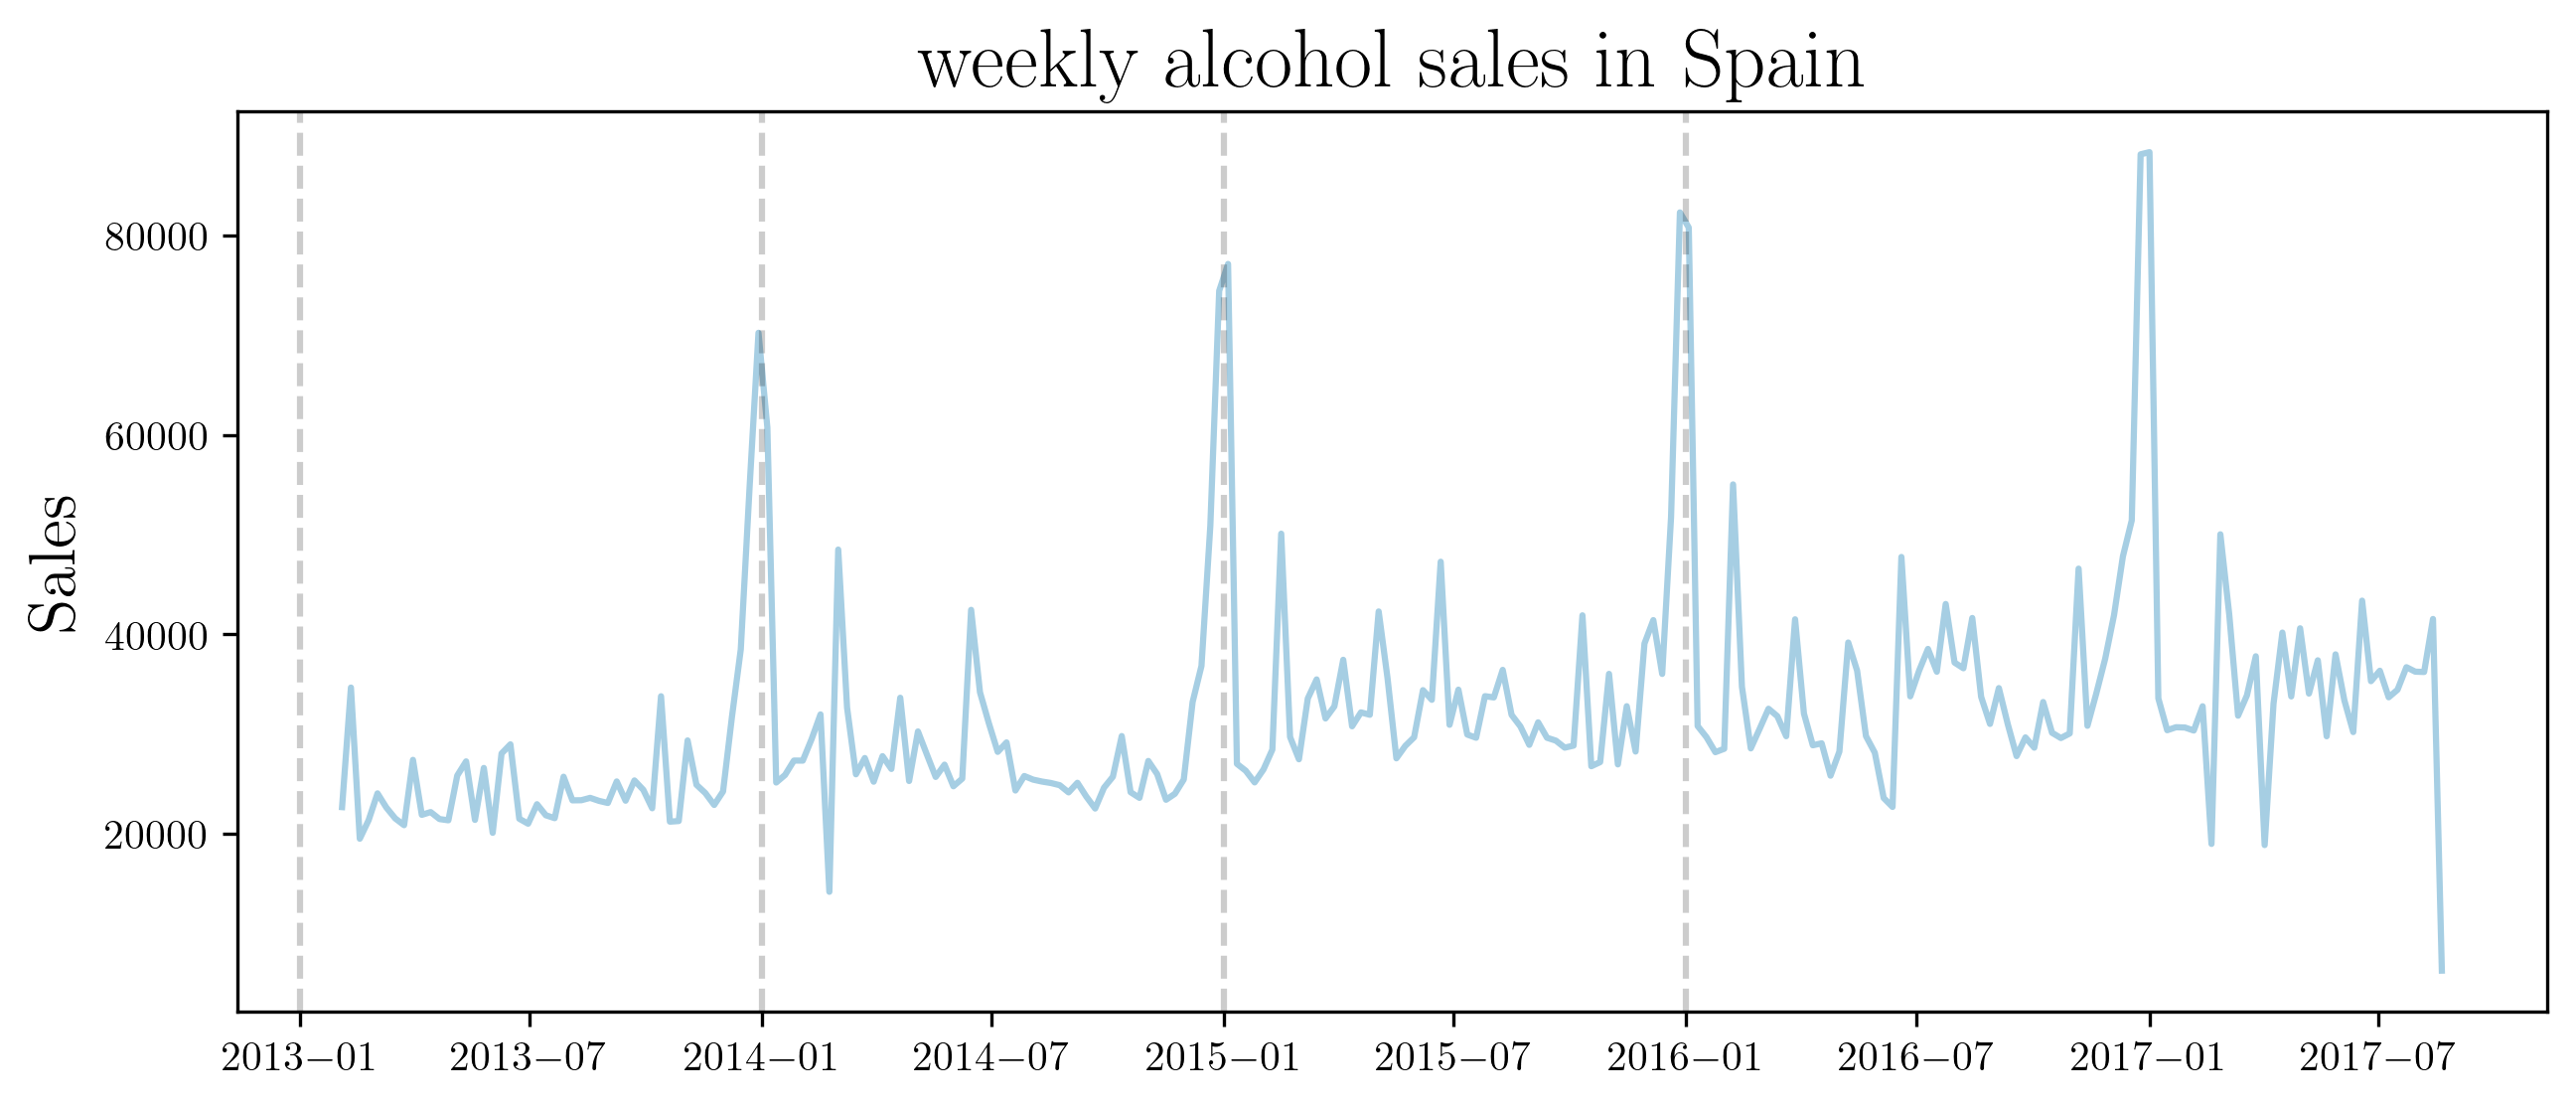

In [14]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

liquors = pd.read_csv('datasets/liquor.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

liquors = liquors.asfreq(pd.infer_freq(liquors.index))
liquors = liquors.resample('W').sum().bfill()

start_date = datetime(2013,1,31)
end_date = datetime(2017,8,31)
lim_liquors = liquors[start_date:end_date]


plt.figure(figsize=(10,4))
plt.plot(lim_liquors)
plt.title('weekly alcohol sales in Spain', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


# Check for stationarity: 
if adf_test is not significant, we proceed with the process of differencing:

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# We remove trend 

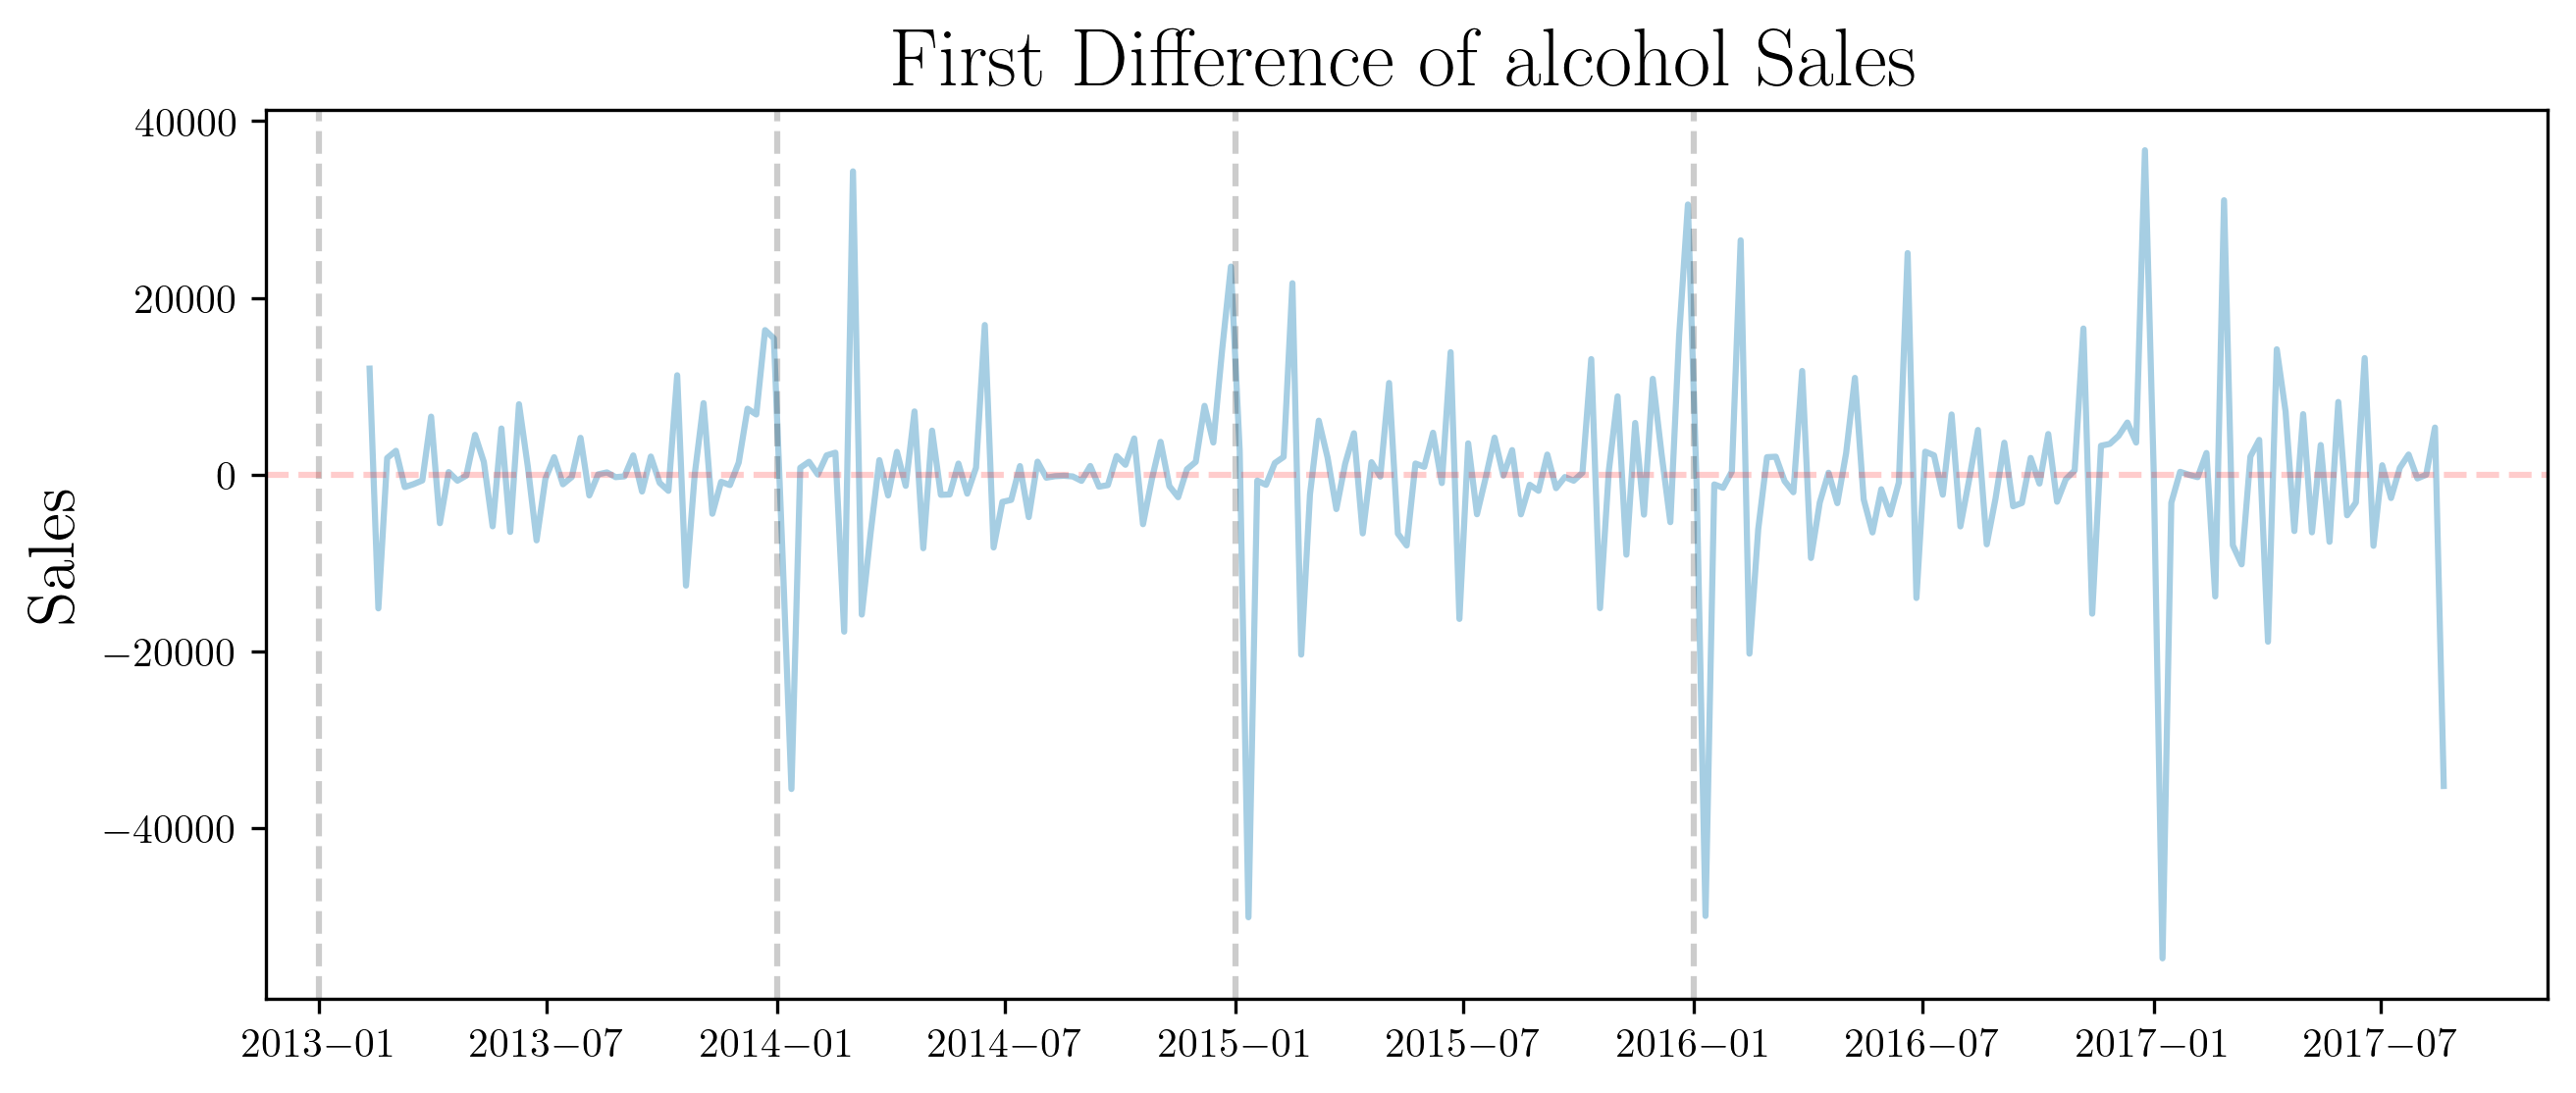

In [15]:
first_diff = lim_liquors.diff()[1:]

plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of alcohol Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

<BarContainer object of 10 artists>

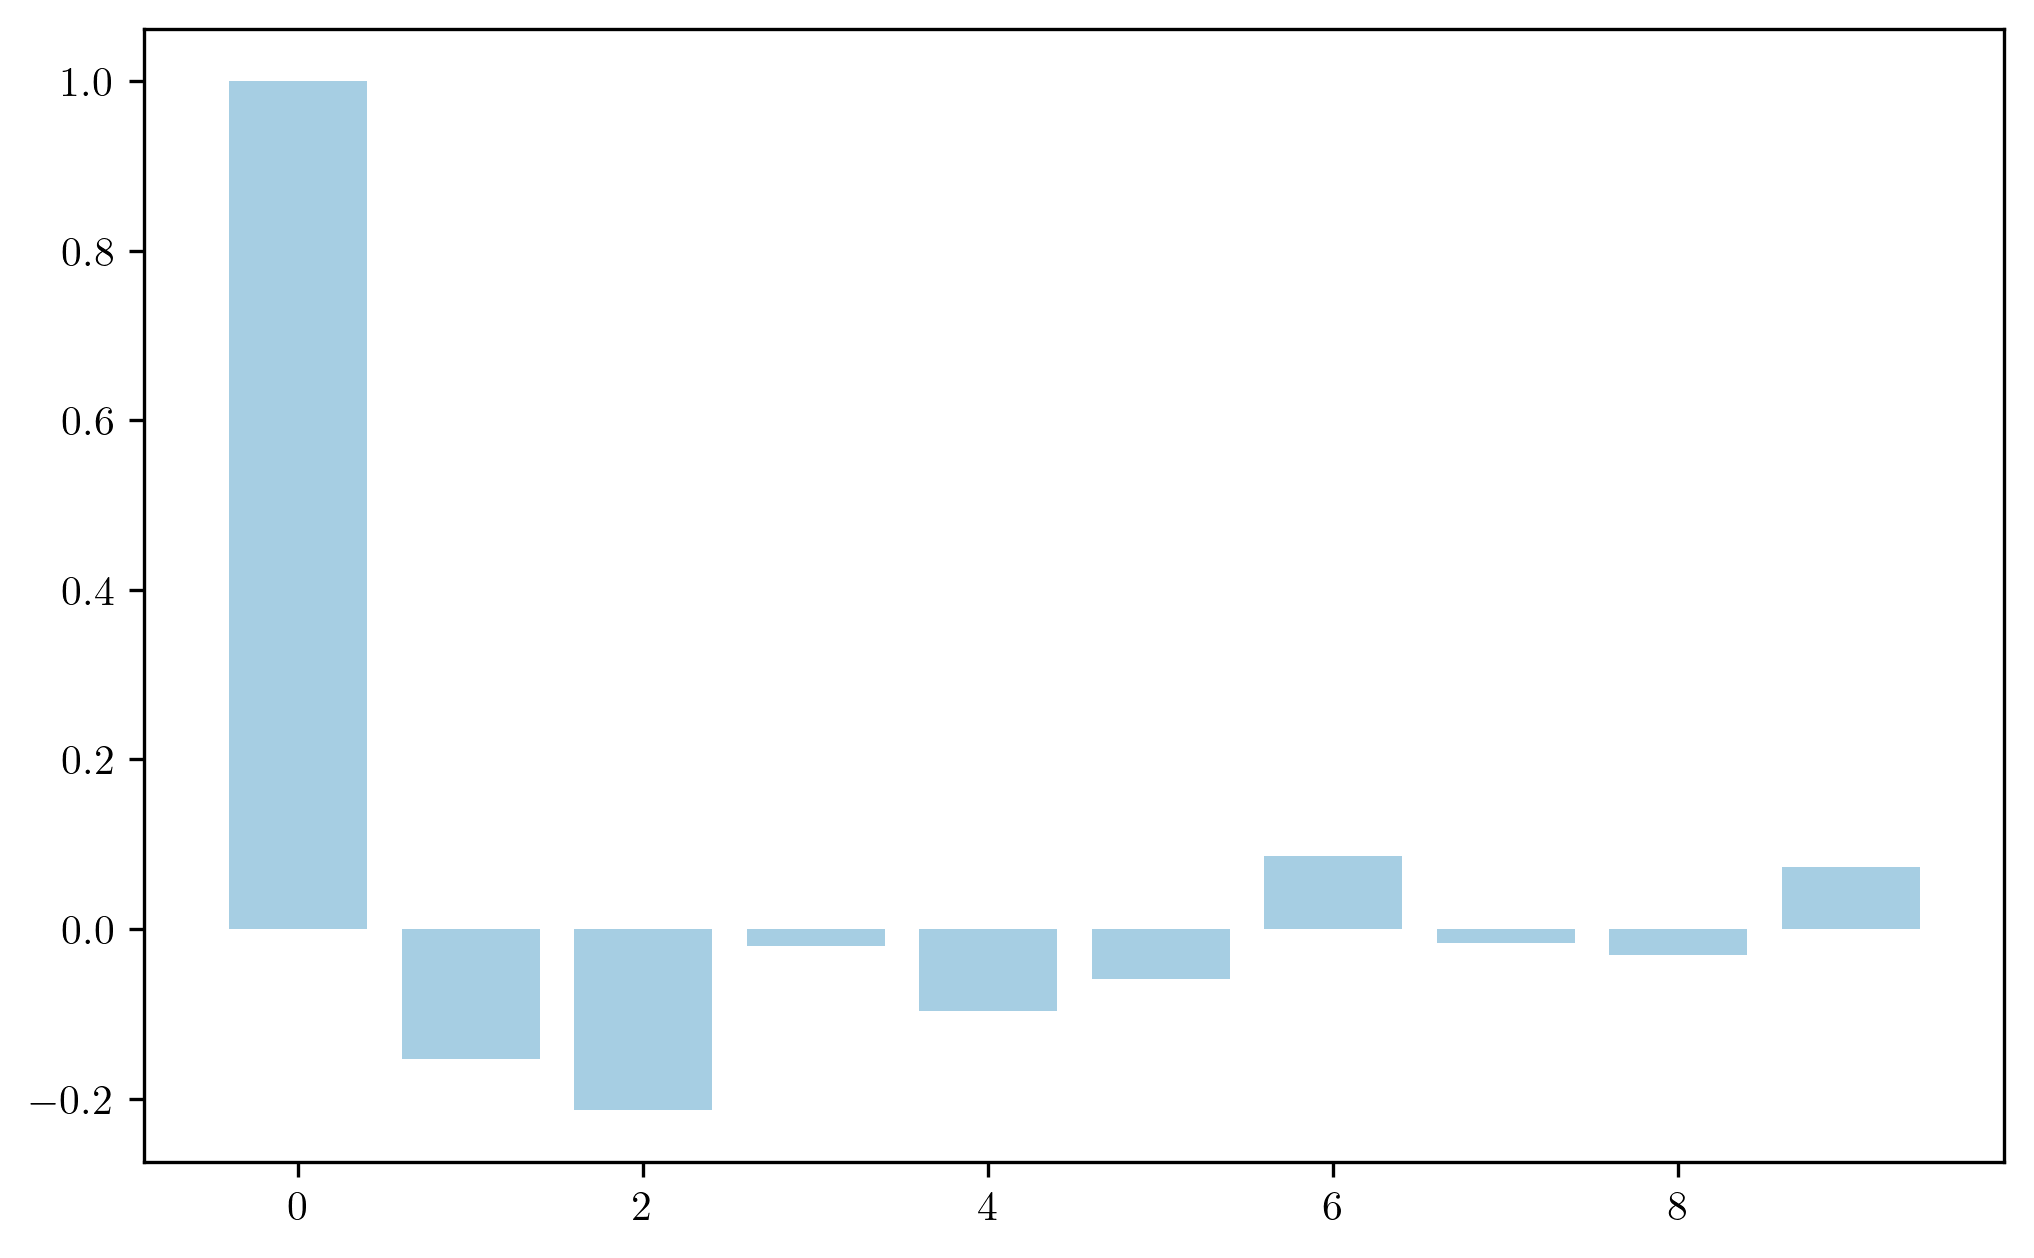

In [16]:

num_lags = 10
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 10 artists>

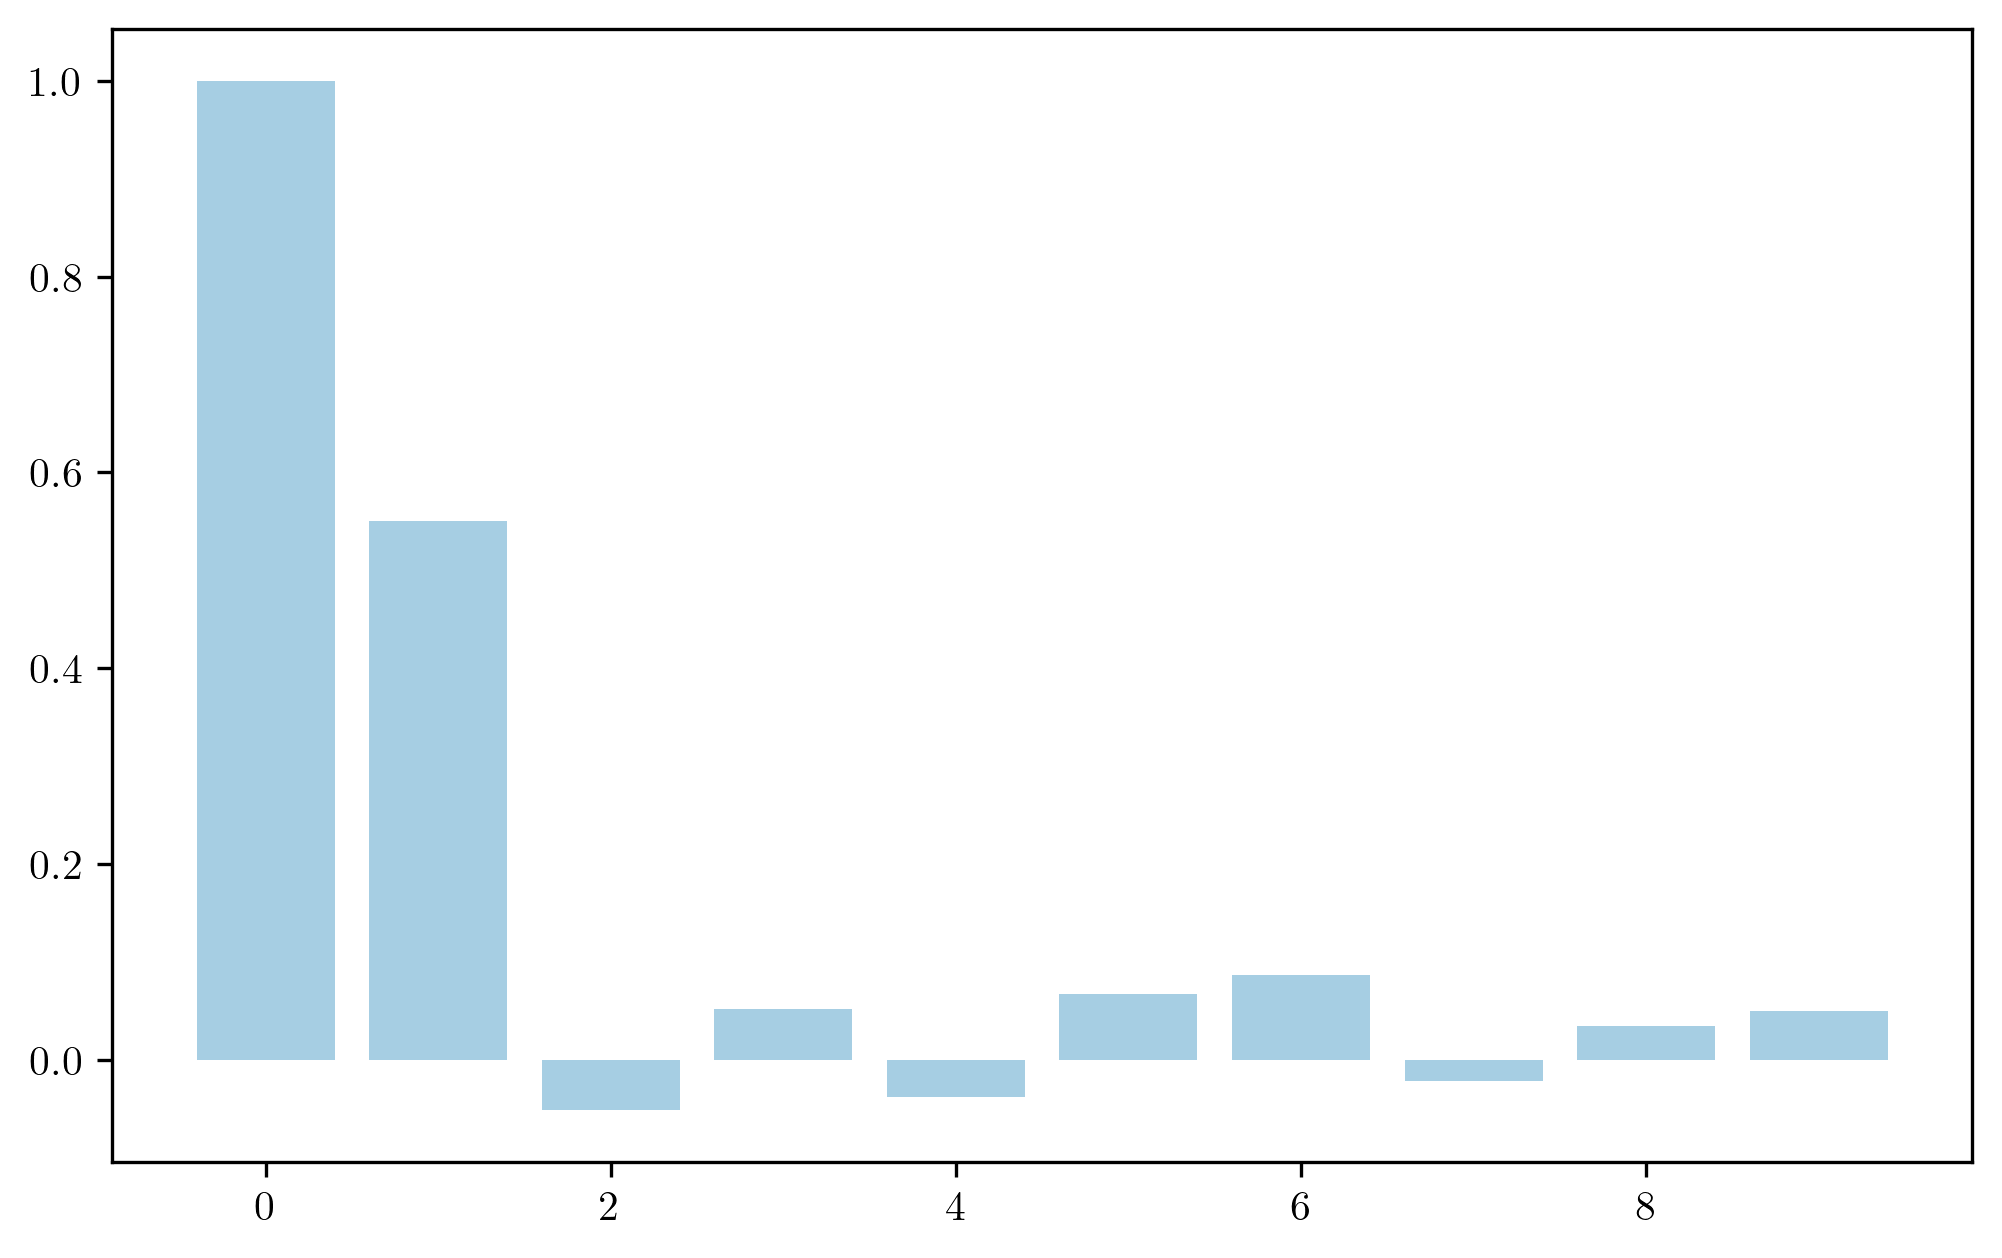

In [18]:
pacf_vals = pacf(lim_liquors)
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
train_end = datetime(2016,8,1)
test_end = datetime(2017,8,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

# build a simple AR Model

In [29]:
# define model
model = ARIMA(train_data, order=(1,1,1))

#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

#summary of the model
print(model_fit.summary())

Model Fitting Time: 0.06862664222717285
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  237
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2491.054
Date:                Wed, 10 May 2023   AIC                           4988.107
Time:                        08:55:13   BIC                           4998.499
Sample:                    02-03-2013   HQIC                          4992.296
                         - 08-13-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5244      0.052     10.111      0.000       0.423       0.626
ma.L1         -0.9704      0.027    -35.738      0.000      -1.024      -0.917
sigma2      

Root Mean Squared Error: 11273.763861046993


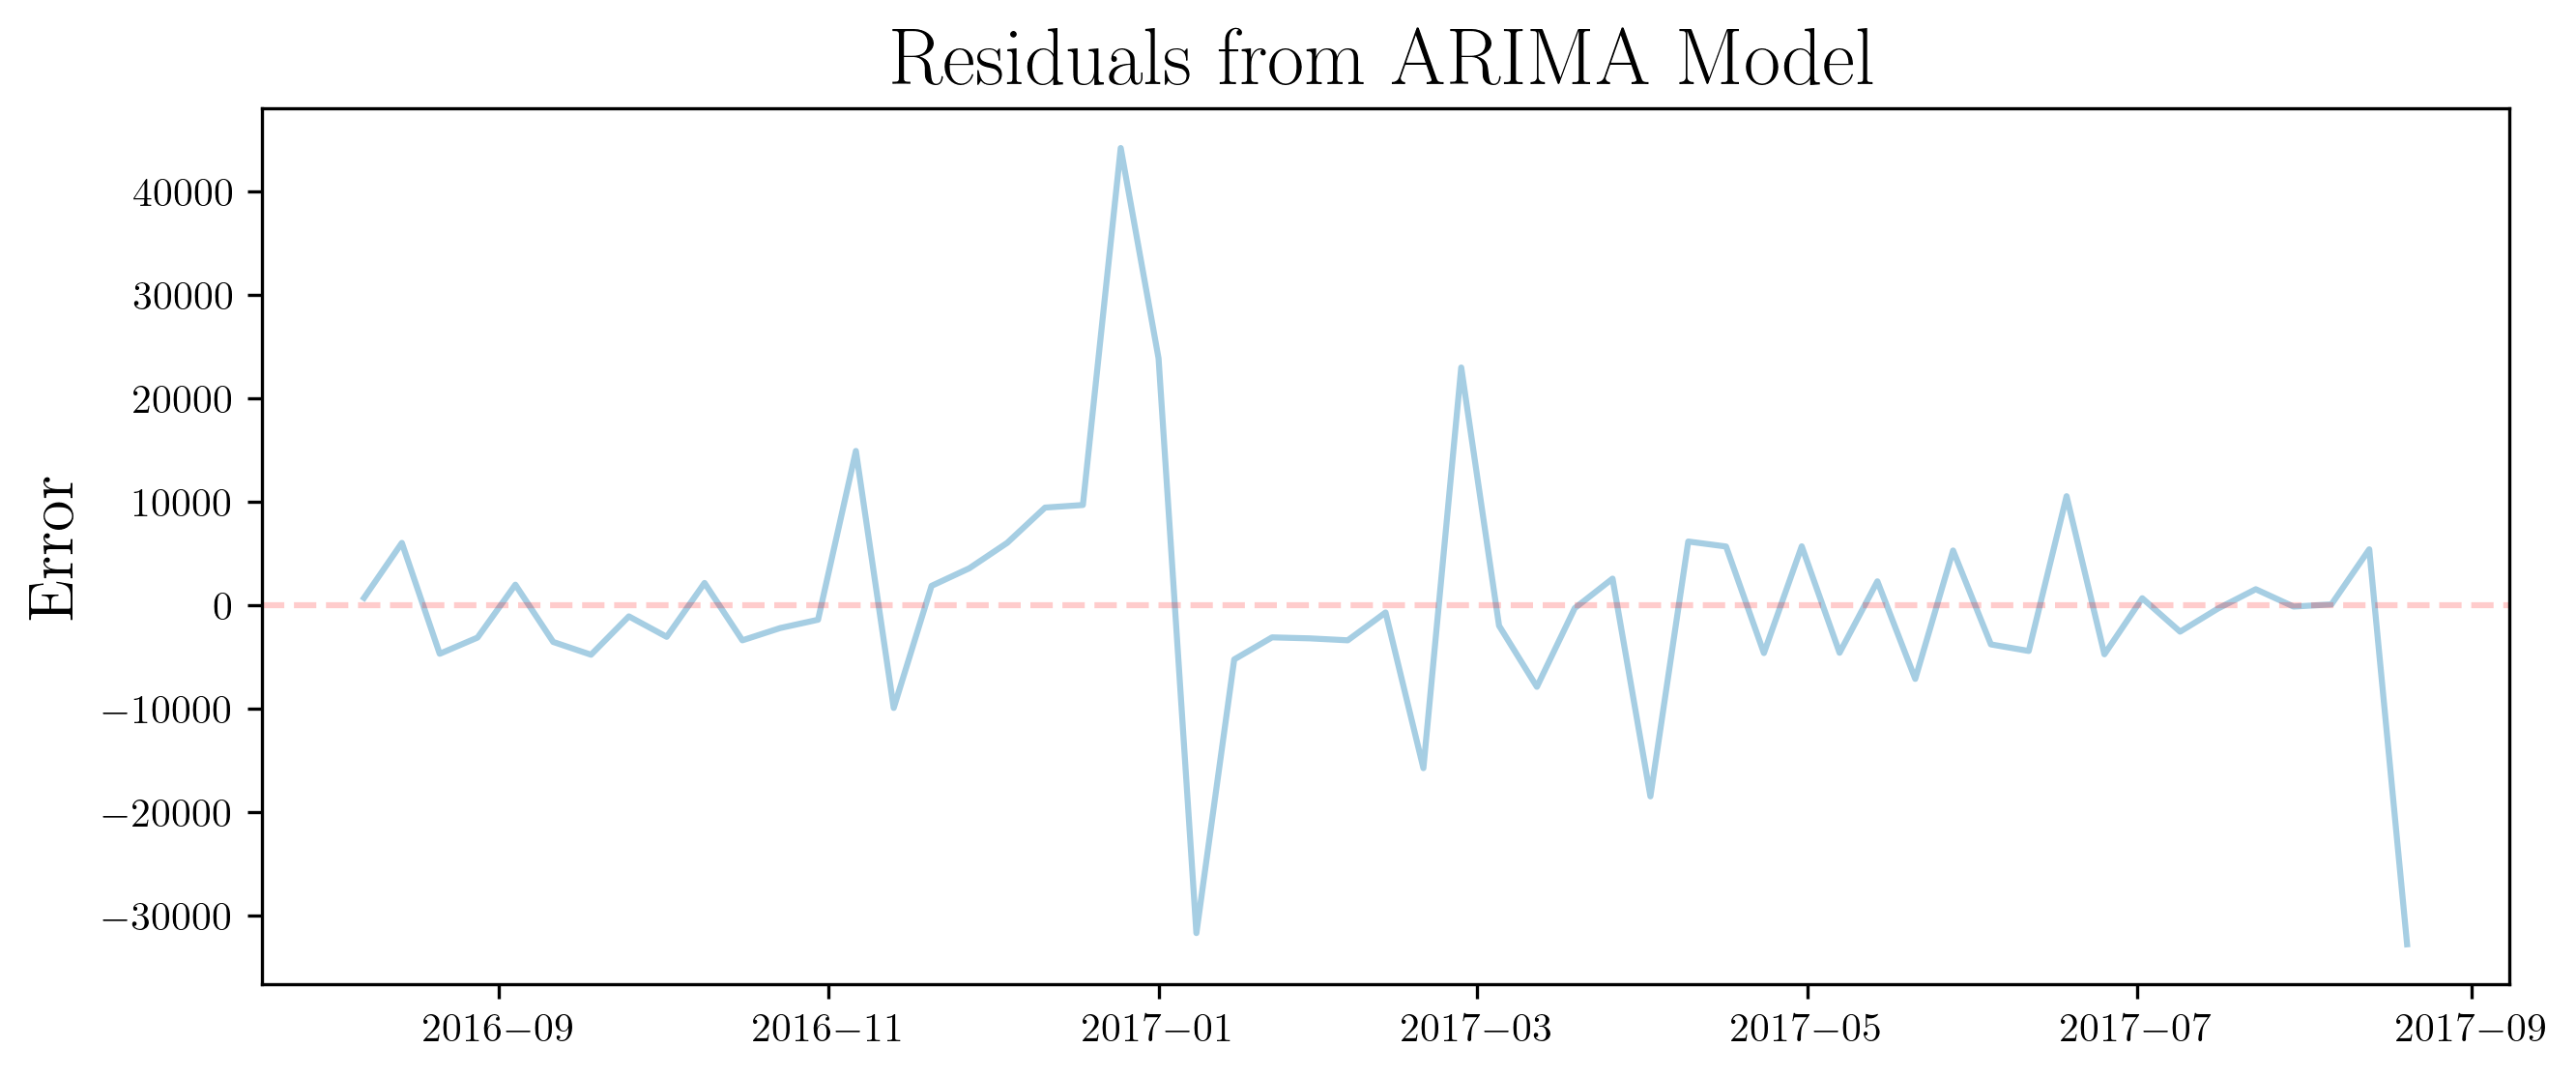

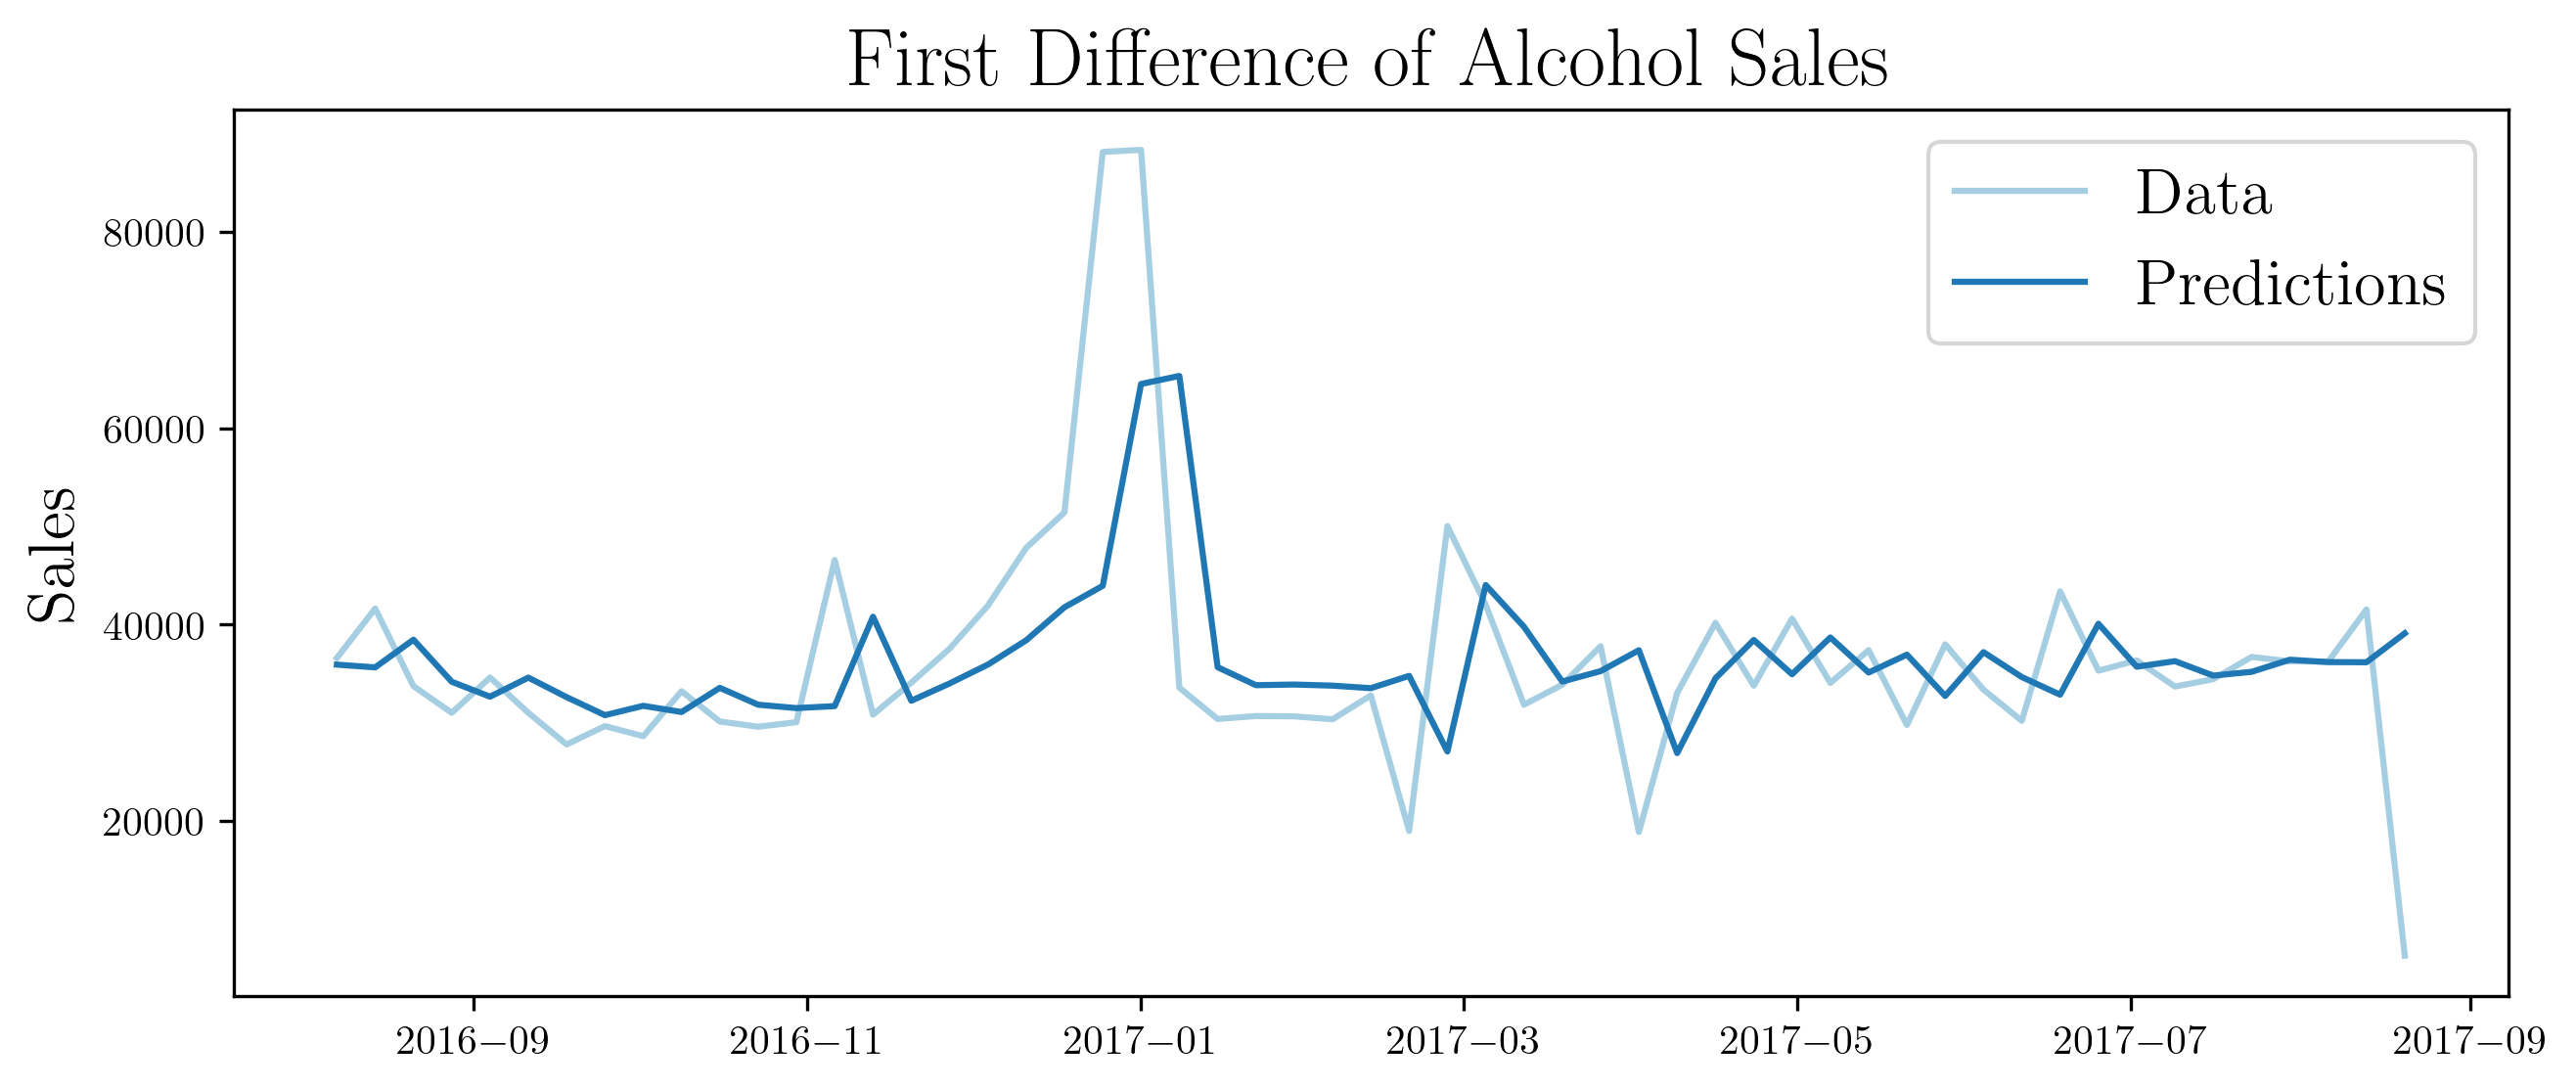

In [33]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Alcohol Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))



# SARIMA

In [35]:
train_end = datetime(2016,8,1)
test_end = datetime(2017,8,20)

train_data = lim_liquors[:train_end]
test_data = lim_liquors[train_end + timedelta(days=1):test_end]

Model Fitting Time: 0.13498663902282715
                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                  183
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1931.900
Date:                              Wed, 10 May 2023   AIC                           3869.799
Time:                                      08:58:39   BIC                           3879.411
Sample:                                  02-03-2013   HQIC                          3873.696
                                       - 07-31-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3315      0.777      0.426      0.670    

Text(0, 0.5, 'Error')

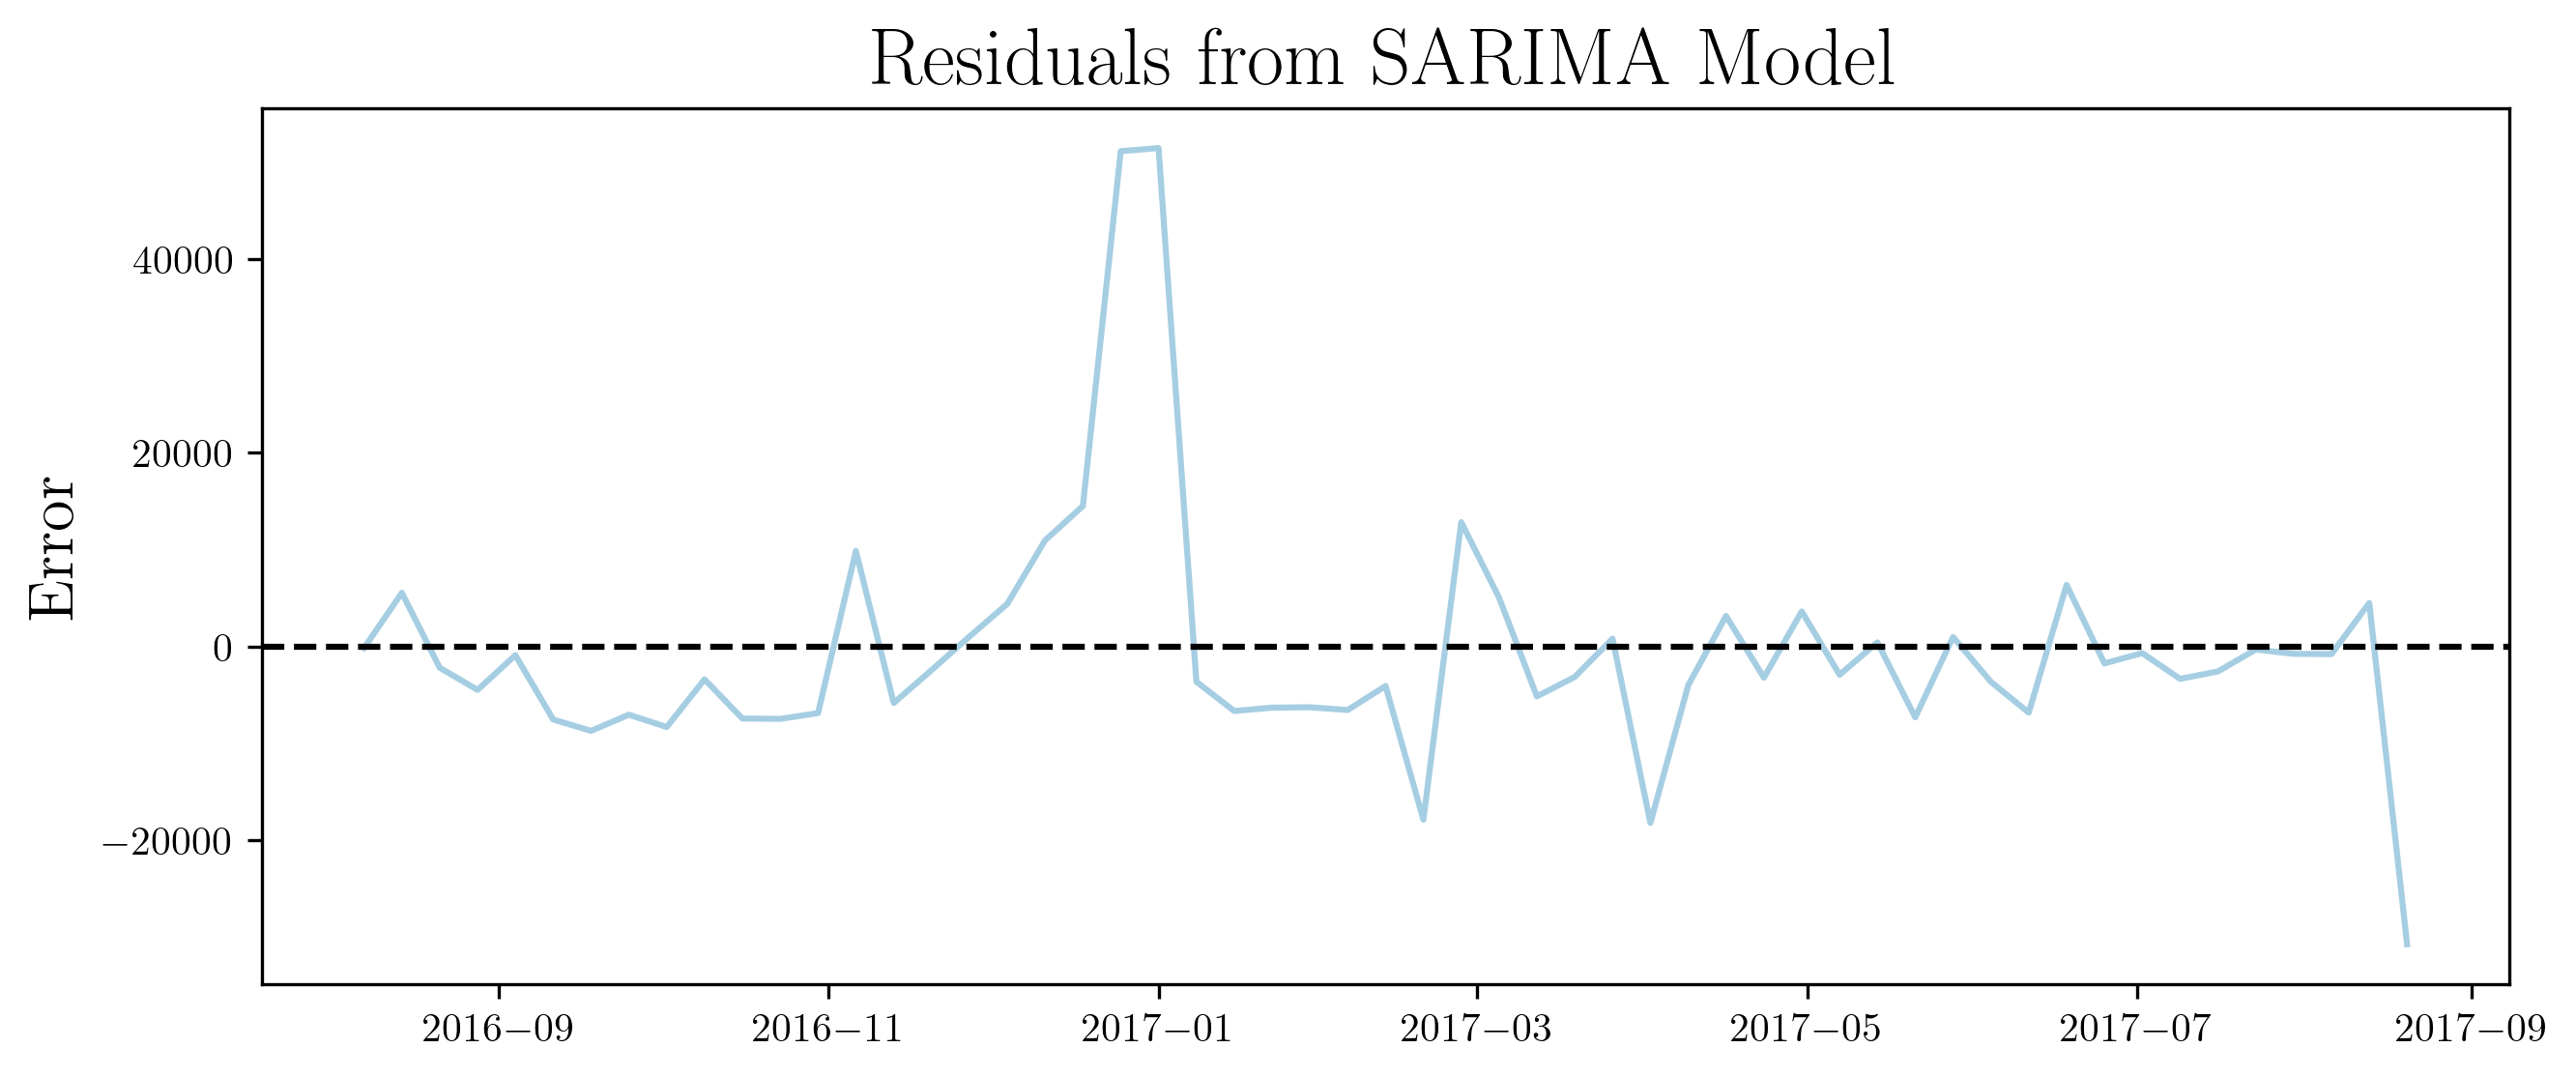

In [36]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
#summary of the model
print(model_fit.summary())

#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)




Mean Absolute Percent Error: 0.2677
Root Mean Squared Error: 12432.493320942669


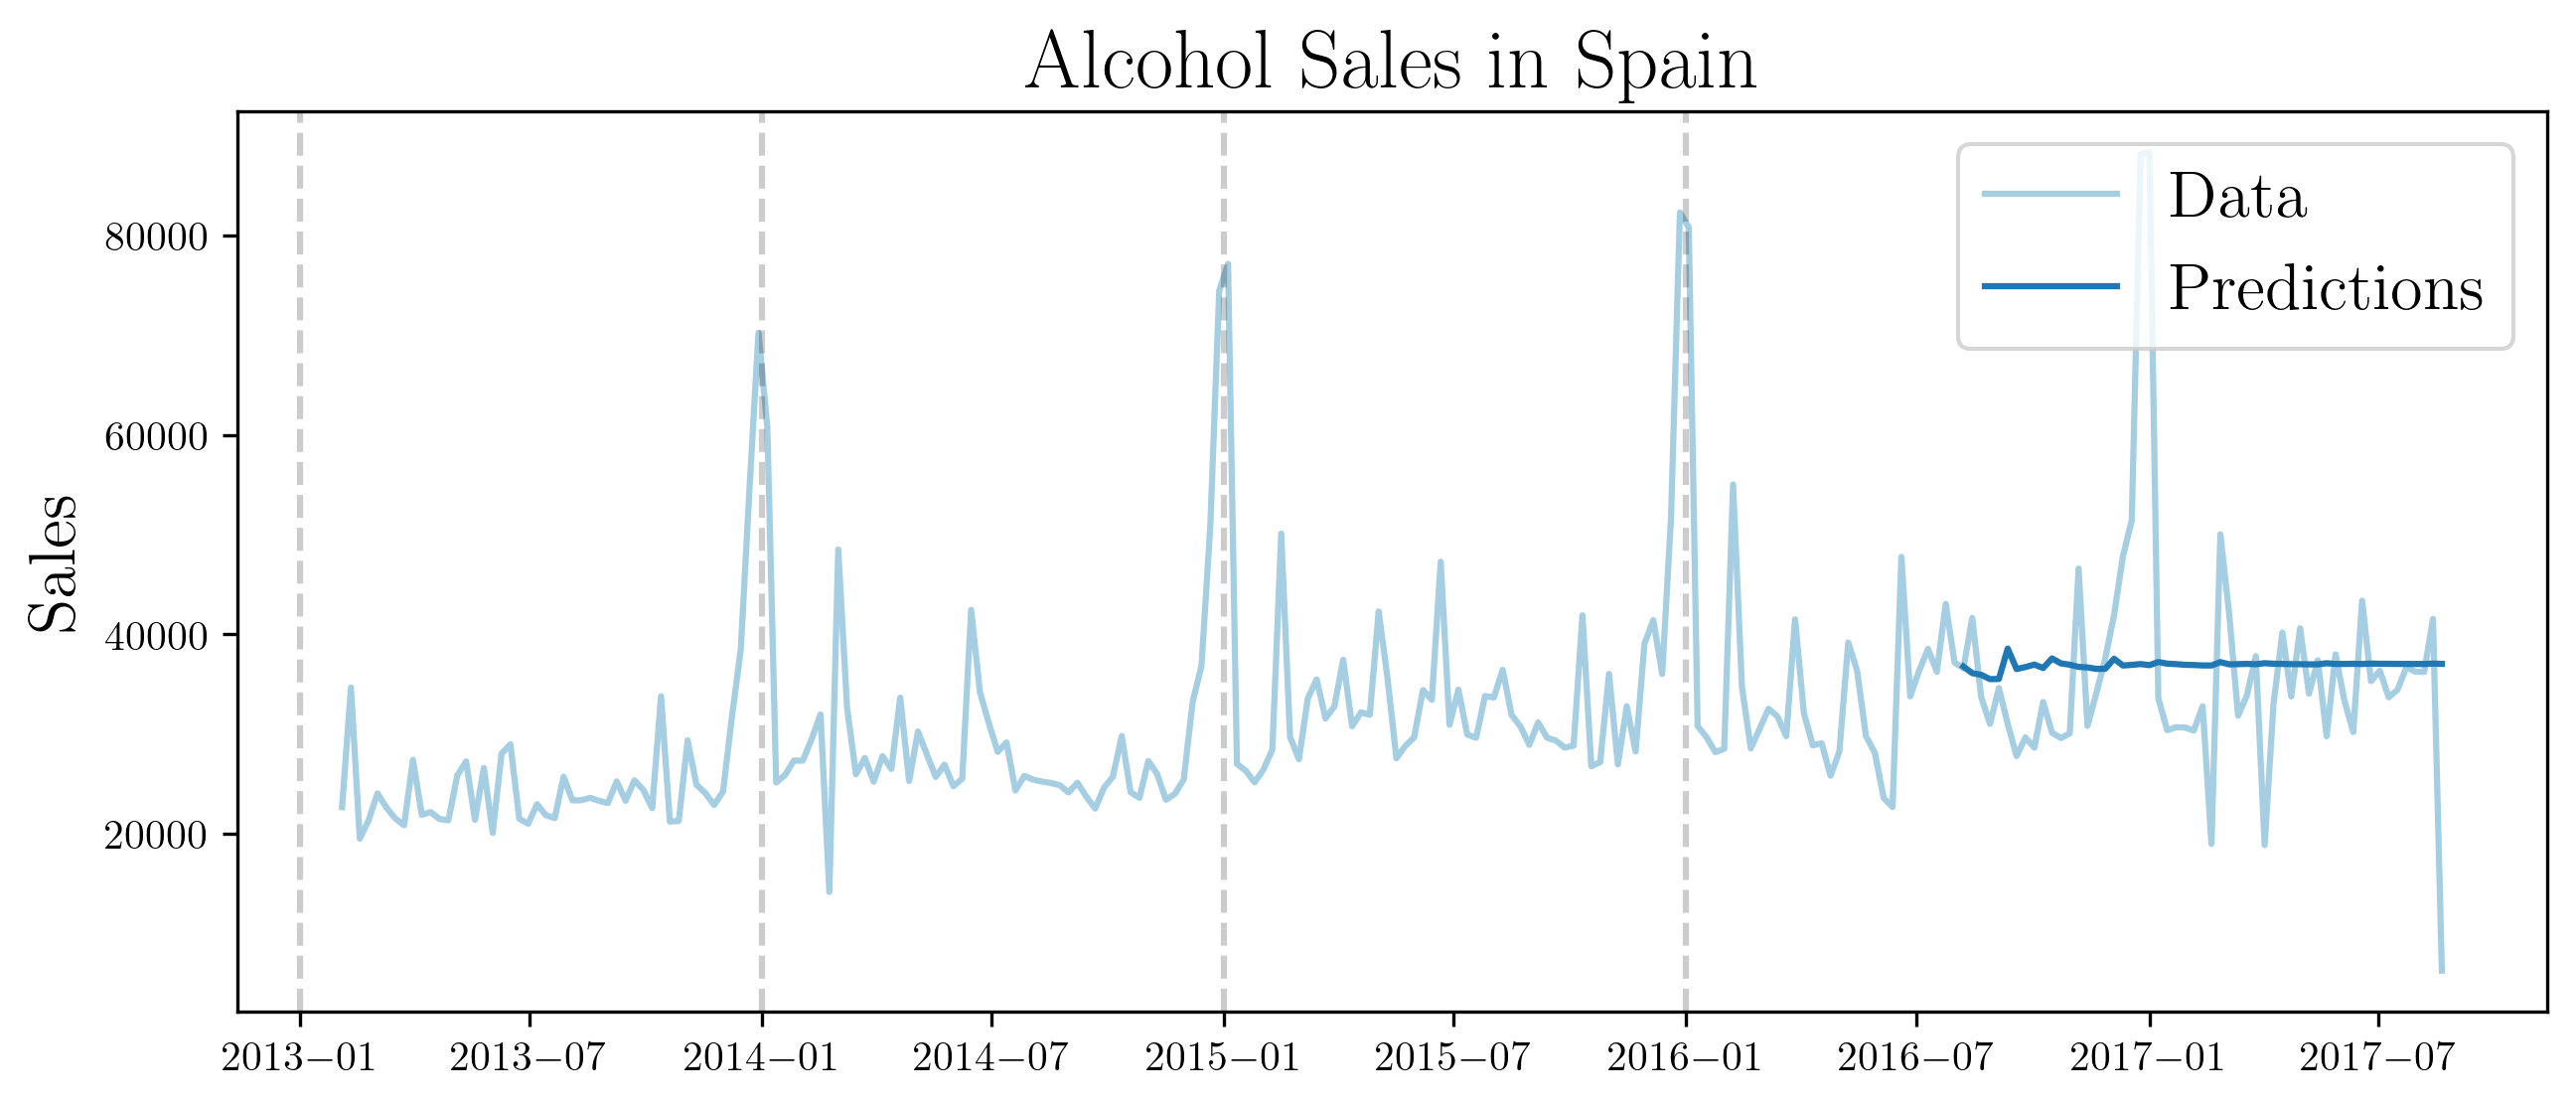

In [37]:
plt.figure(figsize=(10,4))

plt.plot(lim_liquors)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Alcohol Sales in Spain', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Text(0, 0.5, 'Error')

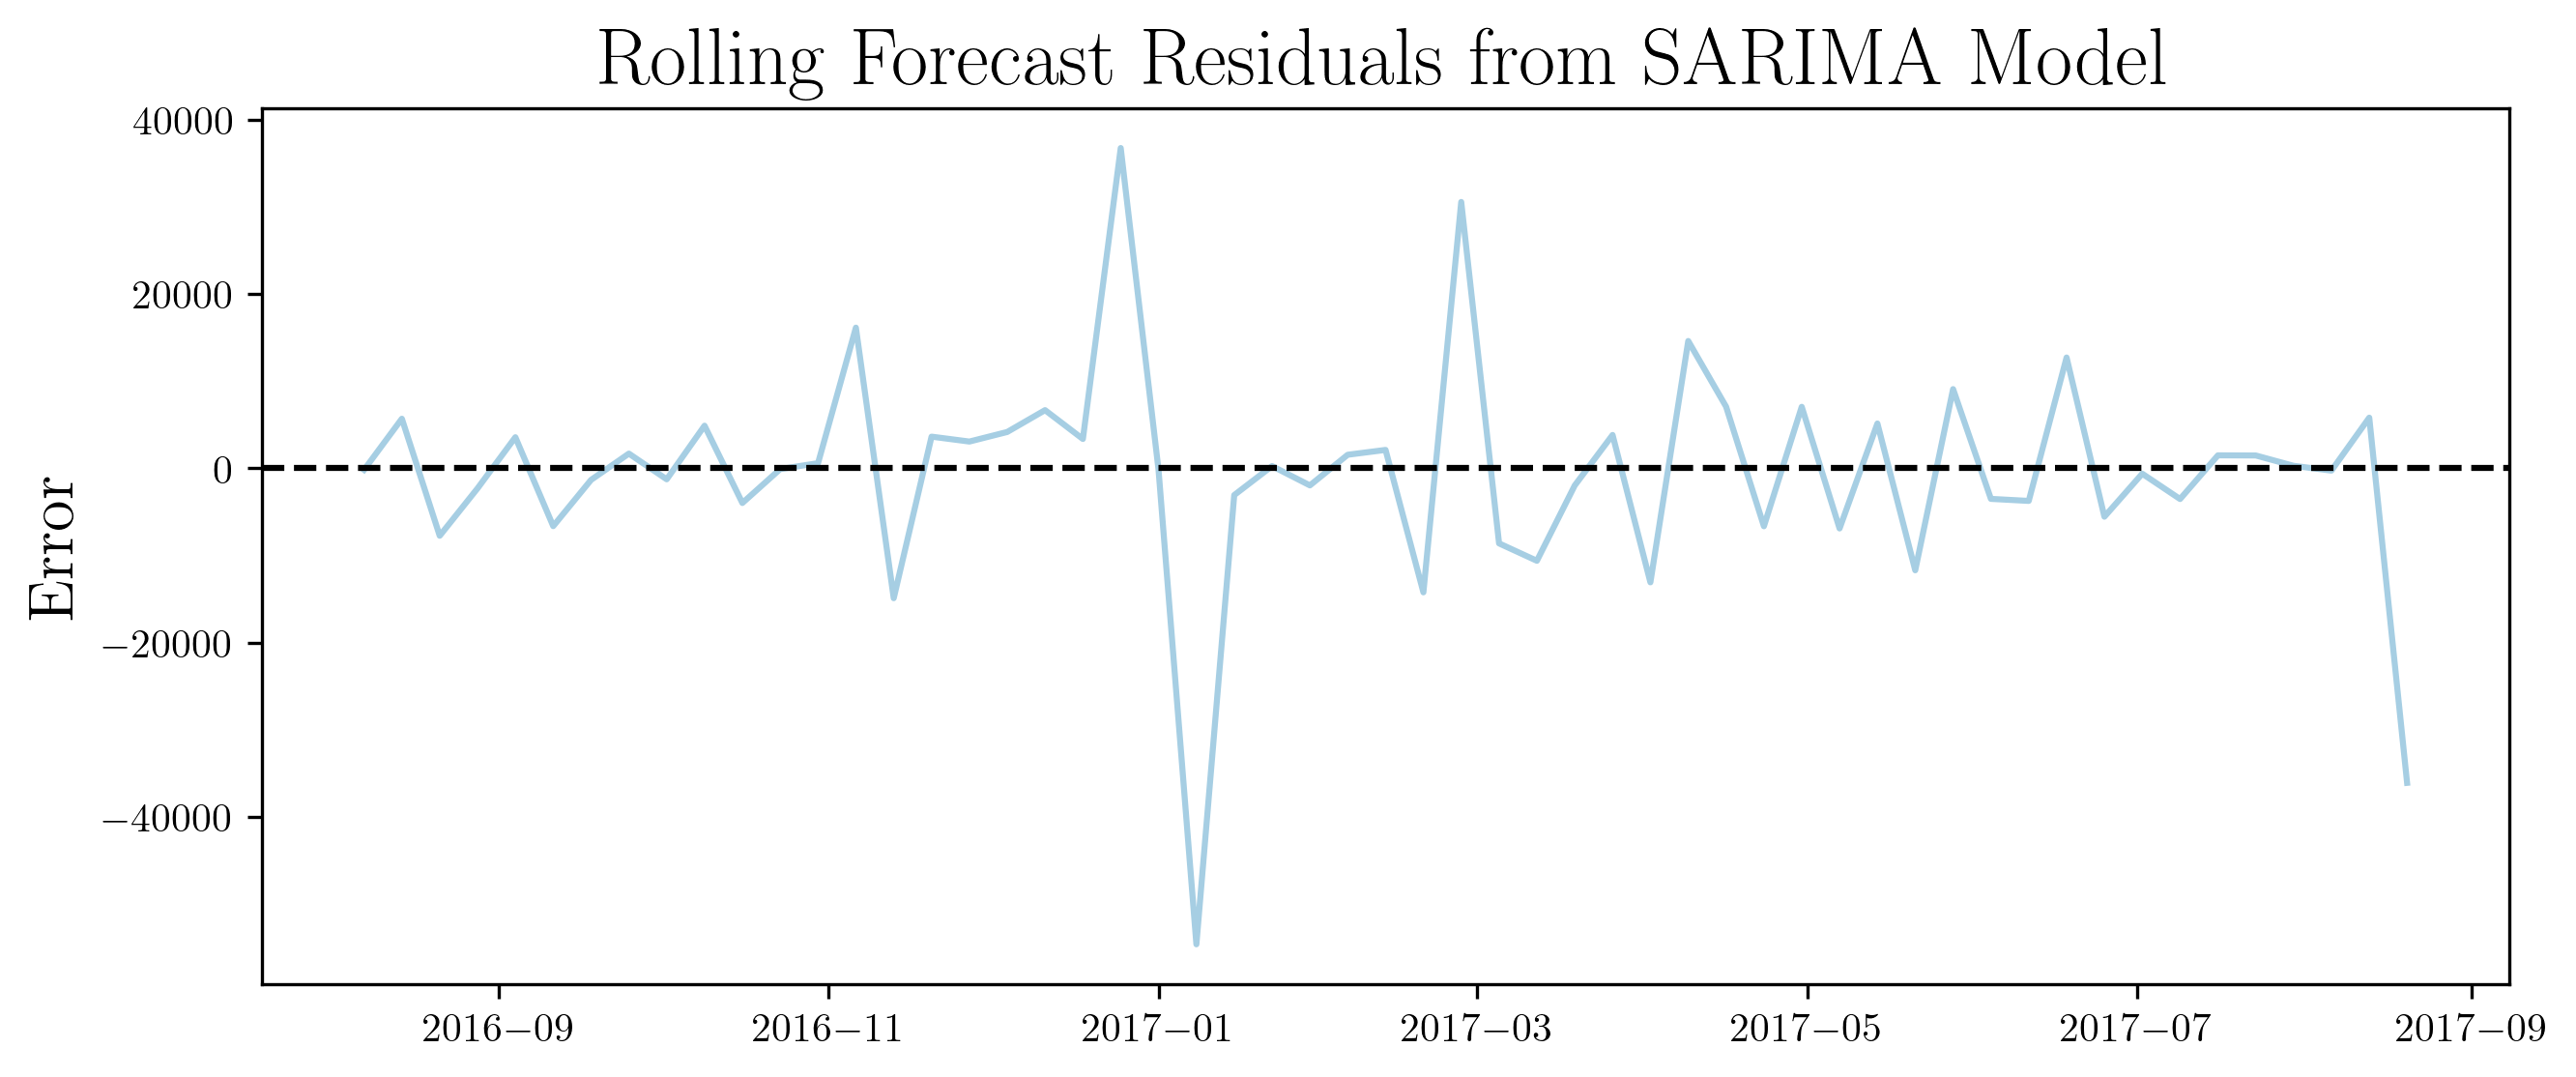

In [27]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_liquors[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
rolling_residuals = test_data - rolling_predictions
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

# Final Forecast

Mean Absolute Percent Error: 0.2973
Root Mean Squared Error: 12702.241354475394
Mean Absolute Percent Error: 0.2973
Root Mean Squared Error: 12702.241354475394


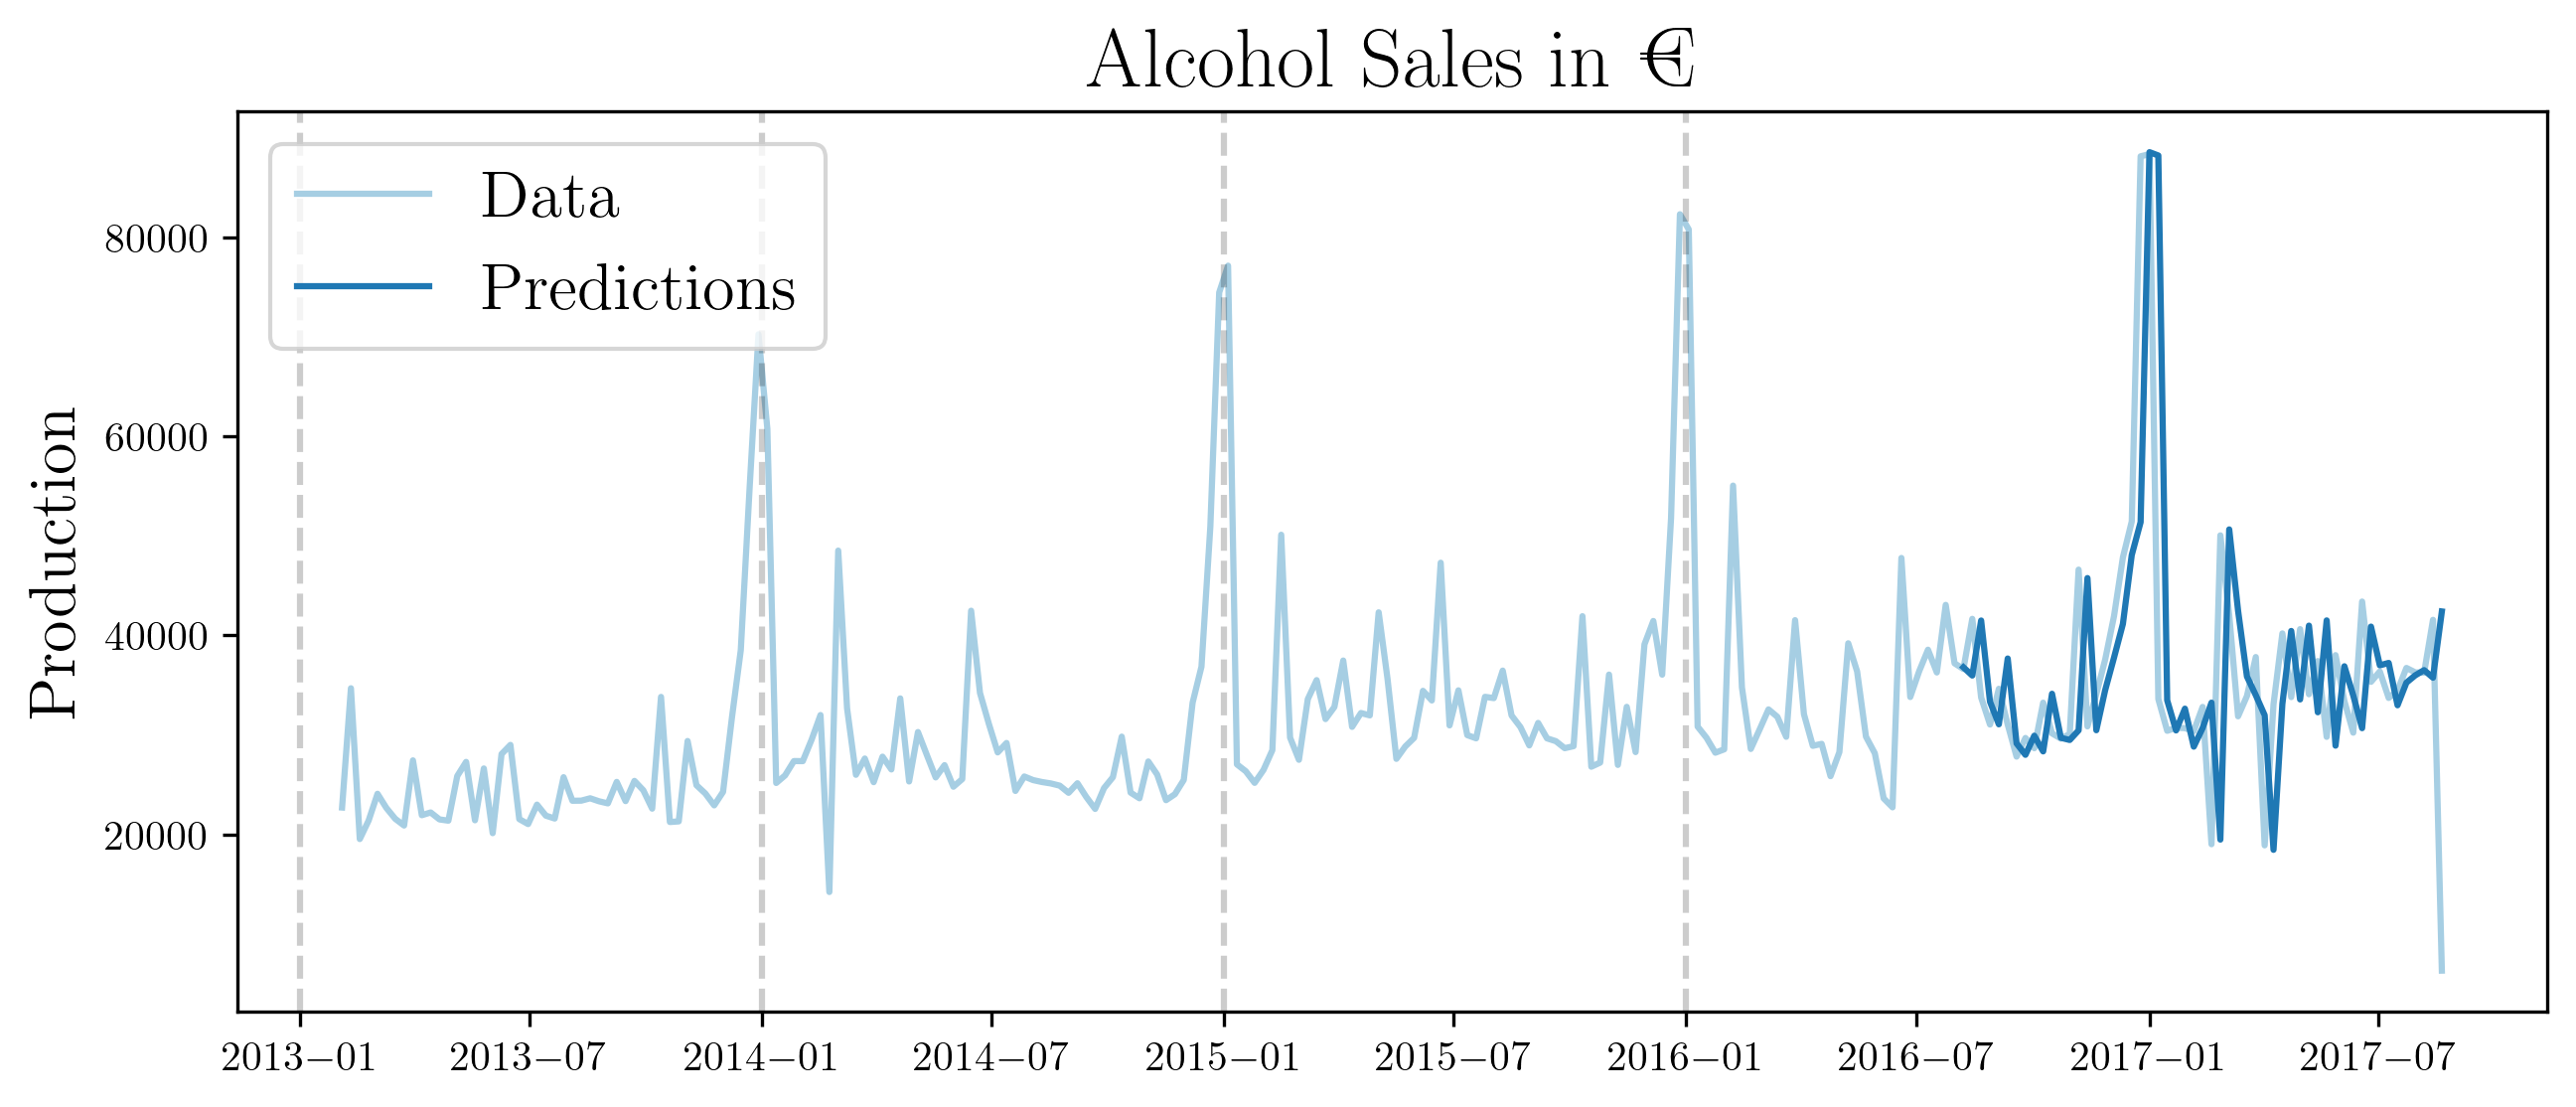

In [28]:
plt.figure(figsize=(10,4))

plt.plot(lim_liquors)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Alcohol Sales in €', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))